In [ ]:
import pandas as pd 
import os

for dataset in ["ArticularyWordRecognition", "BasicMotions", "EMOPain", "Epilepsy", "JapaneseVowels", "UWaveGestureLibrary"]:
    
    df = pd.read_csv(f"{dataset}.csv")
    # nur die Zeilen mit TSCMamba filtern 
    df = df[df['Model'] == 'TSCMamba']
    mean_cols = [
        'Model',
        'Acc_Clean_No_Attack_mean', 
        'Acc_FGSM_eps0005_mean', 
        'Acc_PGD_eps0005__10_steps_mean',
    ]
    df = df[mean_cols].transpose() * 100
    

    print(df.to_latex(index=False, float_format="%.2f", escape=False))

\begin{tabular}{llll}
\toprule
0 & 2 & 4 & 6 \\
\midrule
TSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMamba & TSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCMambaTSCM

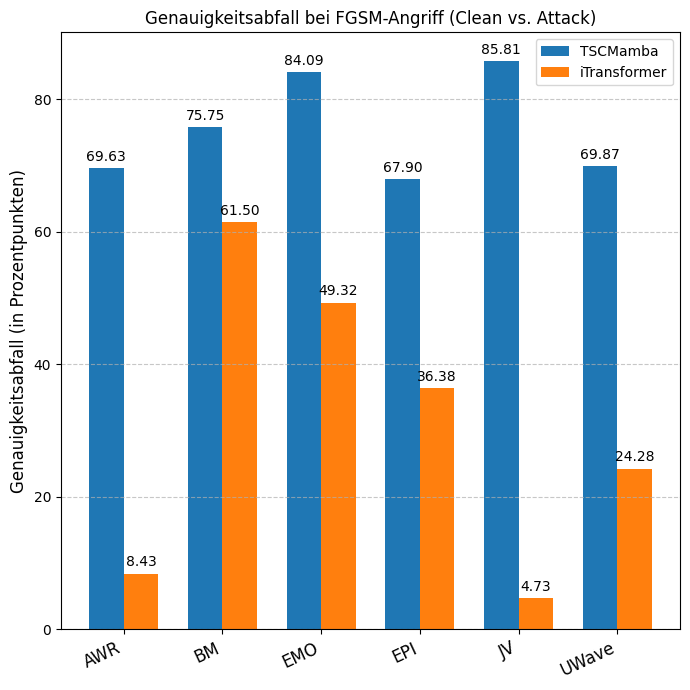

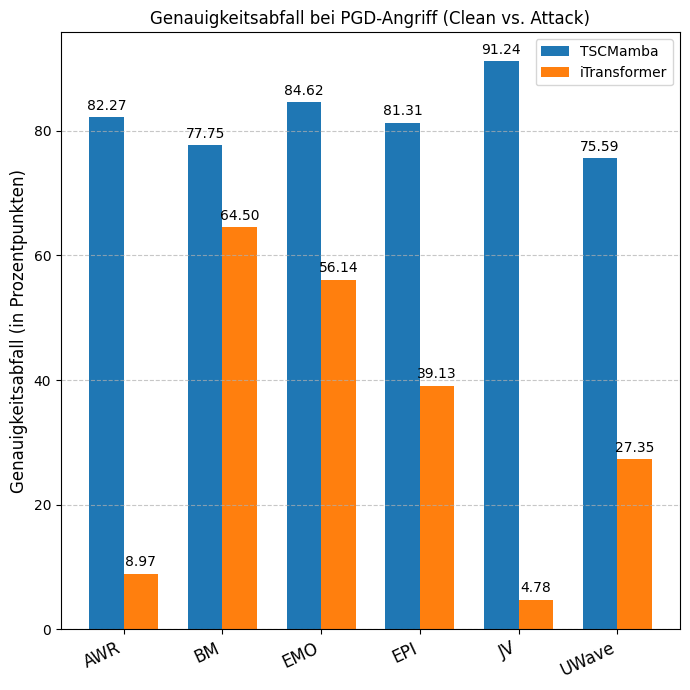

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Daten für TSCMamba
tscmamba_data = {
    'AWR': {'Clean': 88.40, 'FGSM': 18.77, 'PGD': 6.13},
    'BM':              {'Clean': 79.75, 'FGSM': 4.00,  'PGD': 2.00},
    'EMO':                   {'Clean': 85.72, 'FGSM': 1.63,  'PGD': 1.10},
    'EPI':                  {'Clean': 92.54, 'FGSM': 24.64, 'PGD': 11.23},
    'JV':            {'Clean': 93.05, 'FGSM': 7.24,  'PGD': 1.81},
    'UWave':       {'Clean': 83.53, 'FGSM': 13.66, 'PGD': 7.94}
}

# Daten für iTransformer
itransformer_data = {
    'AWR': {'Clean': 98.50, 'FGSM': 90.07, 'PGD': 89.53},
    'BM':              {'Clean': 85.75, 'FGSM': 24.25, 'PGD': 21.25},
    'EMO':                   {'Clean': 85.66, 'FGSM': 36.34, 'PGD': 29.52},
    'EPI':                  {'Clean': 86.38, 'FGSM': 50.00, 'PGD': 47.25},
    'JV':            {'Clean': 96.81, 'FGSM': 92.08, 'PGD': 92.03},
    'UWave':       {'Clean': 83.16, 'FGSM': 58.88, 'PGD': 55.81}
}


datasets = list(tscmamba_data.keys())
accuracy_drops = pd.DataFrame(index=datasets)

# Berechne den Abfall für jeden Datensatz und jedes Modell
for ds in datasets:
    # FGSM Abfall
    accuracy_drops.loc[ds, 'TSCMamba_FGSM_Drop'] = tscmamba_data[ds]['Clean'] - tscmamba_data[ds]['FGSM']
    accuracy_drops.loc[ds, 'iTransformer_FGSM_Drop'] = itransformer_data[ds]['Clean'] - itransformer_data[ds]['FGSM']
    
    # PGD Abfall
    accuracy_drops.loc[ds, 'TSCMamba_PGD_Drop'] = tscmamba_data[ds]['Clean'] - tscmamba_data[ds]['PGD']
    accuracy_drops.loc[ds, 'iTransformer_PGD_Drop'] = itransformer_data[ds]['Clean'] - itransformer_data[ds]['PGD']


# --- 3. Plotting-Funktion (um Code-Wiederholung zu vermeiden) ---
def plot_accuracy_drop(df, attack_type):
    """Erstellt ein gruppiertes Säulendiagramm für den Genauigkeitsabfall."""
    
    # Labels und Werte vorbereiten
    labels = df.index
    tscmamba_drops = df[f'TSCMamba_{attack_type}_Drop']
    itransformer_drops = df[f'iTransformer_{attack_type}_Drop']
    
    x = np.arange(len(labels))  # die Label-Positionen
    width = 0.35  # die Breite der Säulen
    
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # Säulen für TSCMamba (blau) und iTransformer (orange) plotten
    rects1 = ax.bar(x - width/2, tscmamba_drops, width, label='TSCMamba', color='C0') # C0 ist Standard-Blau
    rects2 = ax.bar(x + width/2, itransformer_drops, width, label='iTransformer', color='C1') # C1 ist Standard-Orange
    
    # Beschriftungen, Titel und Legende hinzufügen
    ax.set_ylabel('Genauigkeitsabfall (in Prozentpunkten)', fontsize=12)
    ax.set_title(f'Genauigkeitsabfall bei {attack_type}-Angriff (Clean vs. Attack)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=25, ha="right", fontsize=12)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Labels über den Säulen hinzufügen
    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')
    
    fig.tight_layout()

    plt.savefig(f'Genauigkeitsabfall_{attack_type}.pdf', bbox_inches='tight')  
# Grafik 1: FGSM-Angriff
plot_accuracy_drop(accuracy_drops, 'FGSM')

# Grafik 2: PGD-Angriff
plot_accuracy_drop(accuracy_drops, 'PGD')

In [2]:

import pandas as pd
import glob
import os

def calculate_average_epochs(
    model_name: str, 
    all_files: list,
    directory: str = '.', 
    file_pattern: str = "*.csv", 
) -> pd.Series:
    """
    Analysiert CSV-Dateien, um die durchschnittliche Epochenzahl für ein bestimmtes Modell zu berechnen.

    Args:
        model_name (str): Der Name des Modells, das gefiltert werden soll (z.B. 'iTransformer').
        directory (str): Der Ordner, in dem die CSV-Dateien liegen.
        file_pattern (str): Ein Muster, um die relevanten CSV-Dateien zu finden.
        epoch_adjustment (int): Ein Wert, der vom Endergebnis abgezogen wird.

    Returns:
        pd.Series: Eine Serie mit den berechneten und angepassten Epochen, gruppiert
                   nach der ursprünglichen Zeilennummer.
    """

    # 2. Lese nur die benötigten Spalten aus jeder Datei effizient ein
    list_of_dfs = []
    for file in all_files:
        try:
            # Lese nur die Spalten 'Model' und 'Epochs', um Speicher zu sparen
            df = pd.read_csv(file, usecols=['Model', 'Epochs'])
            list_of_dfs.append(df)
        except ValueError as e:
            # Fehler abfangen, falls eine CSV die Spalten nicht hat
            print(f"Warnung: Datei '{file}' wird übersprungen. Grund: {e}")
        except pd.errors.EmptyDataError:
            print(f"Warnung: Datei '{file}' ist leer und wird übersprungen.")

    if not list_of_dfs:
        print("Fehler: Keine gültigen Daten zum Verarbeiten gefunden.")
        return pd.Series(dtype=float)

    # 3. Korrekte Logik anwenden: Erst kombinieren, dann filtern, dann berechnen
    
    # Alle DataFrames zu einem einzigen grossen DataFrame zusammenfügen
    combined_df = pd.concat(list_of_dfs)
    
    # Filtere NUR die Zeilen, die zum gewünschten Modell gehören
    model_specific_df = combined_df[combined_df['Model'] == model_name]
    
    # Gruppiere nach der ursprünglichen Zeilennummer (Index) und berechne den Durchschnitt
    # nur für die gefilterten Daten.
    average_epochs = model_specific_df.groupby(level=0)['Epochs'].mean()

    return average_epochs

# --- Hauptteil des Skripts ---
if __name__ == "__main__":
    # Liste der Datensätze, die das Muster bilden
    # Dies ist nur zur Demonstration, der Code findet alle CSVs im Ordner
    datasets = [
        "ArticularyWordRecognition.csv", 
        "BasicMotions.csv", 
        "EMOPain.csv", 
        "Epilepsy.csv", 
        "UWaveGestureLibrary.csv"
    ]
    
    # Die Funktion mit dem gewünschten Modell aufrufen
    itransformer_results = calculate_average_epochs(model_name='iTransformer', all_files=datasets)
    
    print("--- Durchschnittliche angepasste Epochen für iTransformer ---")
    if not itransformer_results.empty:
        print(itransformer_results)
    else:
        print("Keine Ergebnisse für 'iTransformer' gefunden.")

    tscmamba_results = calculate_average_epochs(model_name='TSCMamba', all_files=datasets)
    
    print("--- Durchschnittliche angepasste Epochen für TSCMamba ---")
    if not tscmamba_results.empty:
        print(tscmamba_results)
    else:
        print("Keine Ergebnisse für 'TSCMamba' gefunden.")
        

--- Durchschnittliche angepasste Epochen für iTransformer ---
1    213.84
3    268.36
5    364.88
7    336.52
Name: Epochs, dtype: float64
--- Durchschnittliche angepasste Epochen für TSCMamba ---
0    109.92
2    176.20
4    192.26
6    186.12
Name: Epochs, dtype: float64


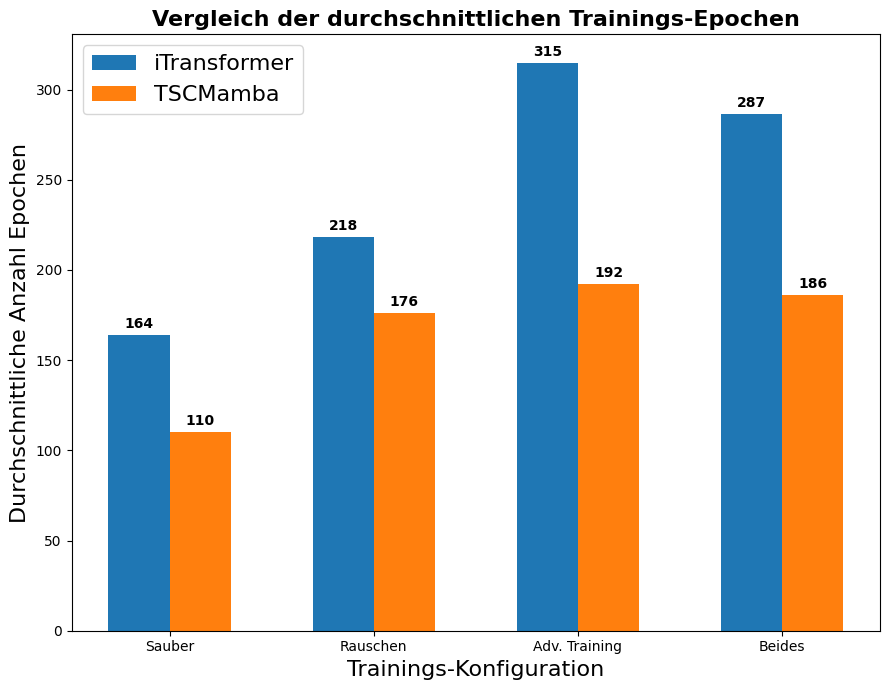

Diagramm wurde als 'vergleich_epochen_saeulendiagramm.png' gespeichert.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Sauber', 'Rauschen', 'Adv. Training', 'Beides']


model_1_werte = itransformer_results
model_1_name = 'iTransformer'
model_1_color = '#1f77b4' 


model_2_werte = tscmamba_results
model_2_name = 'TSCMamba'
model_2_color = '#ff7f0e' 


x = np.arange(len(categories)) 
bar_width = 0.3  


fig, ax = plt.subplots(figsize=(9, 7))


rects1 = ax.bar(x - bar_width/2, model_1_werte, bar_width, label=model_1_name, color=model_1_color)


rects2 = ax.bar(x + bar_width/2, model_2_werte, bar_width, label=model_2_name, color=model_2_color)


ax.set_title('Vergleich der durchschnittlichen Trainings-Epochen', fontsize=16, weight='bold')
ax.set_ylabel('Durchschnittliche Anzahl Epochen', fontsize=16)
ax.set_xlabel('Trainings-Konfiguration', fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(categories)


ax.legend(fontsize = 16)


def add_bar_labels(rects):
    """Fügt Text-Labels über jeder Säule in einer Gruppe hinzu."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', weight='bold')

add_bar_labels(rects1)
add_bar_labels(rects2)

fig.tight_layout()
plt.savefig('vergleich_epochen_saeulendiagramm.pdf')
plt.show()

print("Diagramm wurde als 'vergleich_epochen_saeulendiagramm.png' gespeichert.")

In [ ]:
import csv
import os

def csv_to_latex_table(csv_path, caption, label):
    """
    Liest eine CSV-Datei ein und konvertiert sie in eine LaTeX-Tabelle.

    Die Funktion geht davon aus, dass die erste Spalte Text (z.B. Datensatznamen)
    und die folgenden Spalten numerische Werte enthalten. Numerische Werte
    werden auf zwei Nachkommastellen gerundet.

    Args:
        csv_path (str): Der Pfad zur CSV-Datei.
        caption (str): Die Beschriftung für die LaTeX-Tabelle.
        label (str): Das Label, um auf die Tabelle in LaTeX zu verweisen (z.B. 'tab:my_data').

    Returns:
        str: Ein String, der den vollständigen LaTeX-Code für die Tabelle enthält.
             Gibt None zurück, wenn die Datei nicht gefunden wird.
    """
    if not os.path.exists(csv_path):
        return f"Fehler: Die Datei '{csv_path}' wurde nicht gefunden."

    # CSV-Datei einlesen
    with open(csv_path, mode='r', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        try:
            header = next(reader)
            data_rows = list(reader)
        except StopIteration:
            return "Fehler: Die CSV-Datei ist leer."

    num_columns = len(header)
    
    
    col_spec = 'l' + 'r' * (num_columns - 1)

    # LaTeX-Code-Erstellung
    latex_lines = []
    latex_lines.append("\\begin{table}[htbp]")  
    latex_lines.append("    \\centering")
    latex_lines.append(f"    \\caption{{{caption}}}")
    latex_lines.append(f"    \\label{{{label}}}")
    latex_lines.append(f"    \\begin{{tabular}}{{{col_spec}}}")
    latex_lines.append("        \\toprule")

    formatted_header = [f"\\textbf{{{col.strip()}}}" for col in header]
    latex_lines.append("        " + " & ".join(formatted_header) + " \\\\")
    latex_lines.append("        \\midrule")


    for row in data_rows:
        if not row: continue 
        
        formatted_row = []
        for i, cell in enumerate(row):
            cell = cell.strip()
            # Erste Spalte bleibt Text
            if i == 0:
                formatted_row.append(cell)
                continue
            
            
            try:
                
                value = float(cell) * 100
                
                formatted_cell = f"{value:.2f}"
                formatted_row.append(formatted_cell)
            except (ValueError, TypeError):
                
                formatted_row.append(cell)
        
        latex_lines.append("        " + " & ".join(formatted_row) + " \\\\")

    latex_lines.append("        \\bottomrule")
    latex_lines.append("    \\end{tabular}")
    latex_lines.append("\\end{table}")

    return "\n".join(latex_lines)

if __name__ == "__main__":
    

    for dataset in ['ArticularyWordRecognition.csv', 'BasicMotions.csv', 'EMOPain.csv', 'Epilepsy.csv', 'JapaneseVowels.csv', 'UWaveGestureLibrary.csv']:
        table_caption = "Test"
        table_label = 'test'


        latex_output = csv_to_latex_table(dataset, table_caption, table_label)
        
        print("--- Generierter LaTeX-Code ---")
        print(latex_output)
        print("------------------------------")
    

--- Generierter LaTeX-Code ---
\begin{table}[htbp]
    \centering
    \caption{Test}
    \label{test}
    \begin{tabular}{lrrrrrrrrr}
        \toprule
        \textbf{Model} & \textbf{Epochs} & \textbf{Acc_Clean_No_Attack_mean} & \textbf{Acc_Clean_No_Attack_std} & \textbf{Acc_FGSM_eps0005_mean} & \textbf{Acc_FGSM_eps0005_std} & \textbf{Acc_PGD_eps0005__10_steps_mean} & \textbf{Acc_PGD_eps0005__10_steps_std} & \textbf{Acc_PGD_eps0005__20_steps_mean} & \textbf{Acc_PGD_eps0005__20_steps_std} \\
        \midrule
        TSCMamba & 11640.00 & 88.40 & 1.55 & 18.77 & 6.34 & 6.13 & 3.58 & 4.63 & 2.55 \\
        iTransformer & 20600.00 & 98.50 & 0.36 & 90.07 & 1.10 & 89.53 & 1.10 & 89.43 & 1.12 \\
        TSCMamba & 18300.00 & 90.27 & 1.61 & 52.07 & 14.96 & 39.97 & 14.21 & 35.33 & 13.45 \\
        iTransformer & 24920.00 & 98.60 & 0.38 & 96.20 & 1.31 & 96.13 & 1.33 & 96.13 & 1.33 \\
        TSCMamba & 26800.00 & 91.90 & 1.83 & 82.67 & 3.31 & 82.53 & 3.43 & 82.57 & 3.31 \\
        iTransformer &